# Assignment 2.1: Home Credit Default Risk

The Kaggle dataset on Home Credit Default Risk provides information about the loan applicants' credit bureau data, previous loan records, and other attributes that could influence their ability to repay a loan. The goal is to use this information to predict whether or not an applicant will be able to repay a loan, which is a critical issue for financial services. 

In [1]:
# import libraries

import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)


# Read Dataset

In [2]:
df = pd.read_csv('data/train_data.csv')

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# Exploratory Data Analysis

In [3]:
df.shape

(153755, 122)

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,Cash loans,F,N,Y,1,157500.0,900000.0,26446.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,381230,0,Cash loans,F,N,Y,1,90000.0,733176.0,21438.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0
2,450177,0,Cash loans,F,Y,Y,0,189000.0,1795500.0,62541.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,332445,0,Cash loans,M,Y,N,0,175500.0,494550.0,45490.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,357429,0,Cash loans,F,Y,Y,0,270000.0,1724688.0,54283.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,153755.000000,153755.000000,153755.000000,1.537550e+05,1.537550e+05,153750.000000,1.536060e+05,153755.000000,153755.000000,153755.000000,...,153755.000000,153755.000000,153755.000000,153755.000000,132922.000000,132922.000000,132922.000000,132922.000000,132922.000000,132922.000000
mean,277867.616930,0.080726,0.417398,1.692611e+05,5.988824e+05,27083.127015,5.383057e+05,0.020813,-16025.981438,63742.602751,...,0.007909,0.000650,0.000501,0.000416,0.006417,0.006854,0.034012,0.265547,0.267555,1.901777
std,102831.742645,0.272414,0.722523,3.180805e+05,4.023748e+05,14468.883776,3.693544e+05,0.013796,4363.552861,141204.275368,...,0.088579,0.025494,0.022373,0.020398,0.084608,0.110151,0.201581,0.907185,0.941286,1.873638
min,100004.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.500000e+04,0.000290,-25201.000000,-17583.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188542.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19662.000000,-2746.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277749.000000,0.000000,0.000000,1.462500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15725.000000,-1211.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366718.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12399.000000,-290.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7678.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Inspect dataset for missing data

Drop columns and rows with missing data

<Axes: >

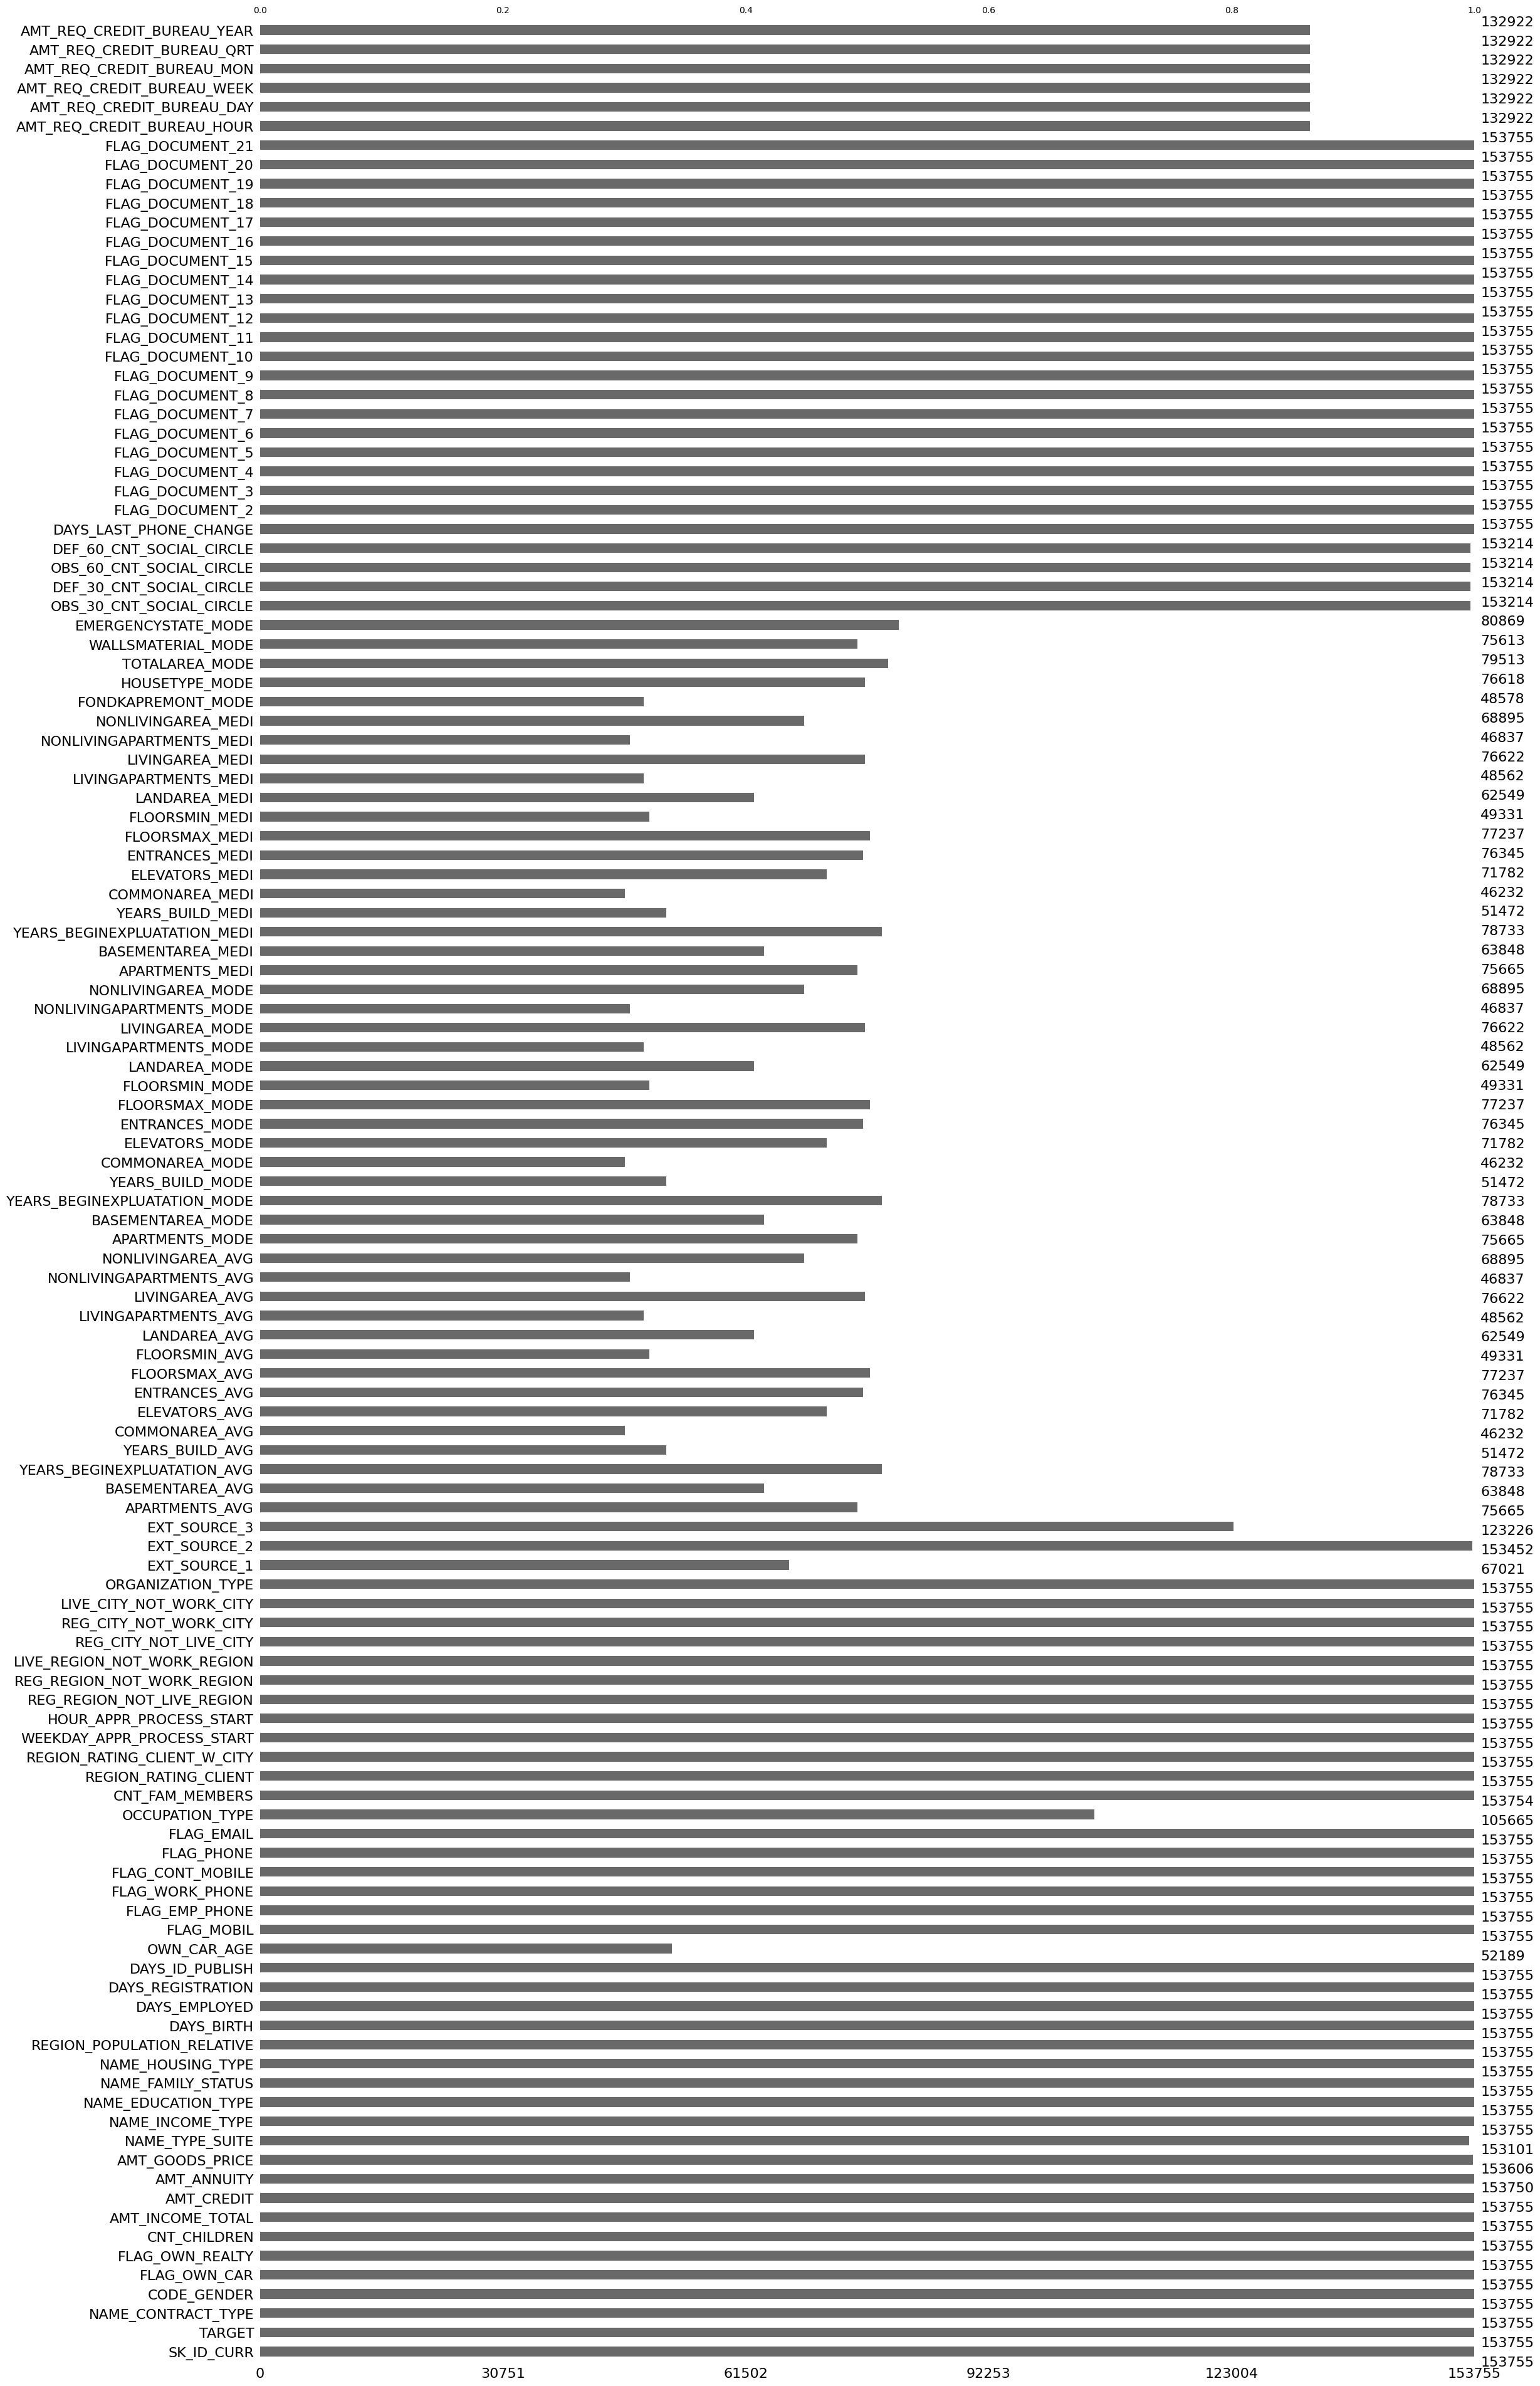

In [6]:
msno.bar(df)

<Axes: >

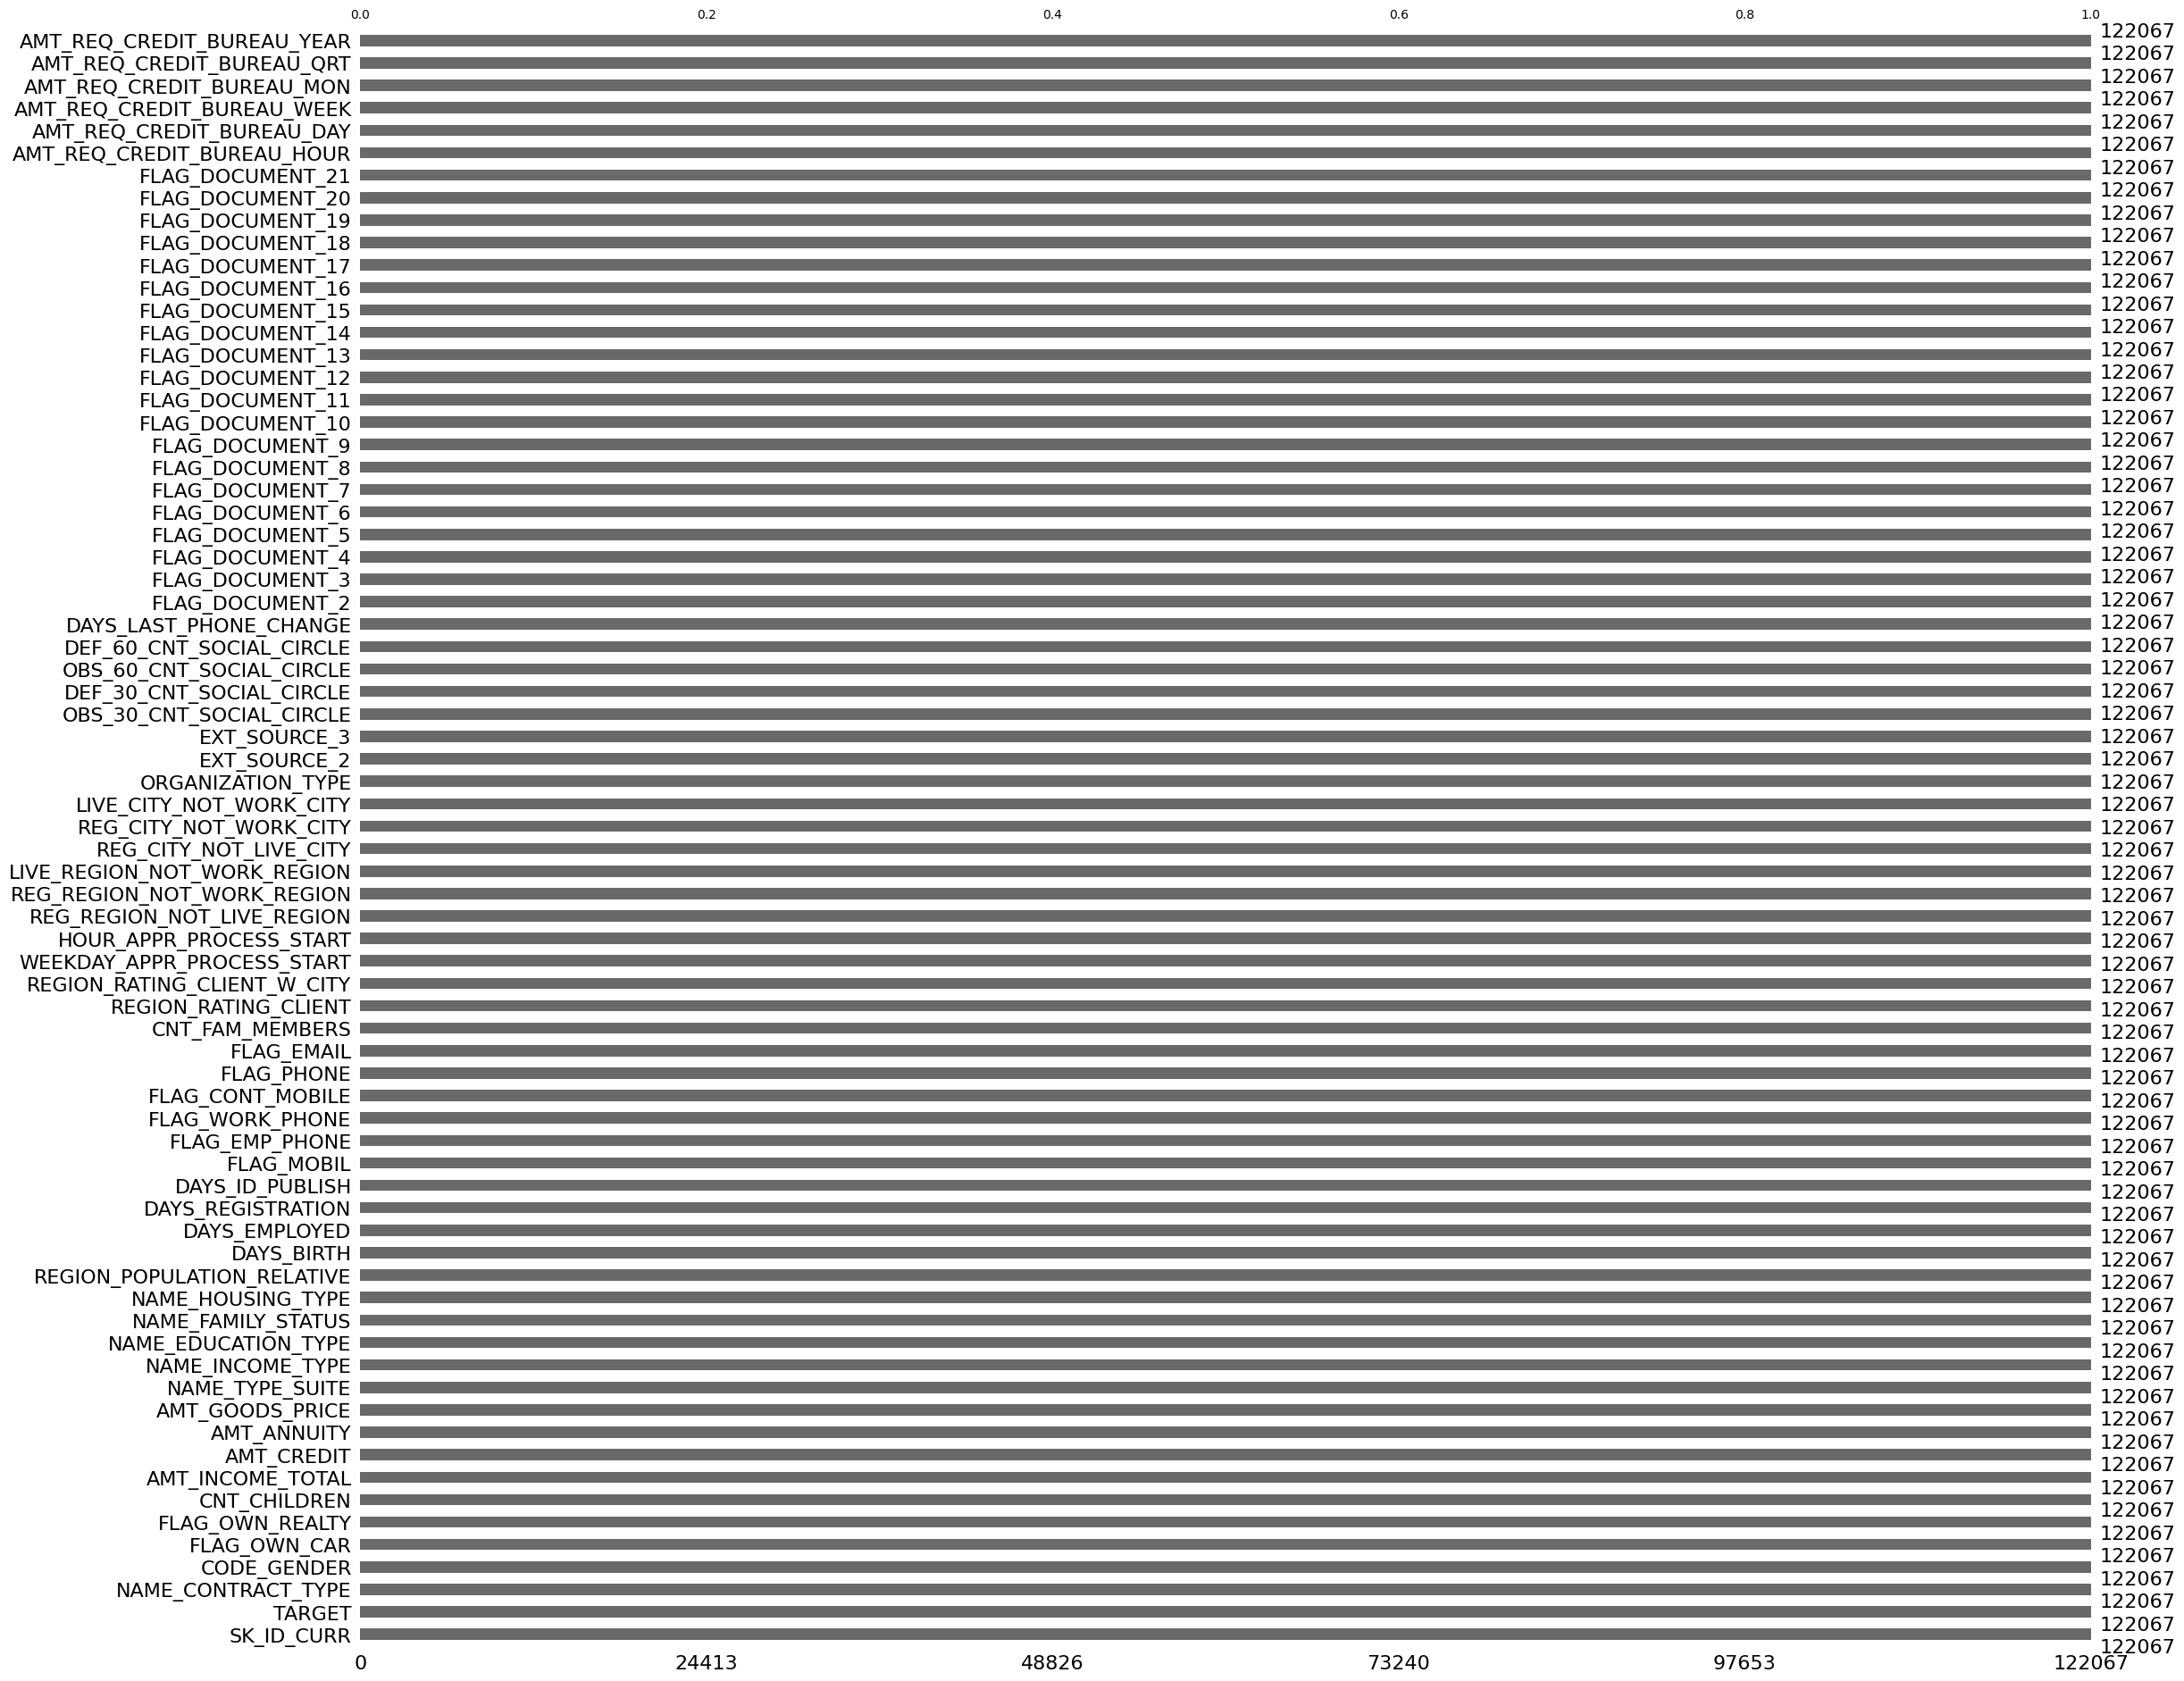

In [7]:
# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100

# Filter out columns with more than 50% missing values
columns_to_drop = missing_percent[missing_percent > 25].index
df.drop(columns=columns_to_drop, inplace=True)

df = df.dropna()

# Display the resulting DataFrame
msno.bar(df)

# Exploratory Data Plots

The bar plot shows that only Cash Loans for defaulted

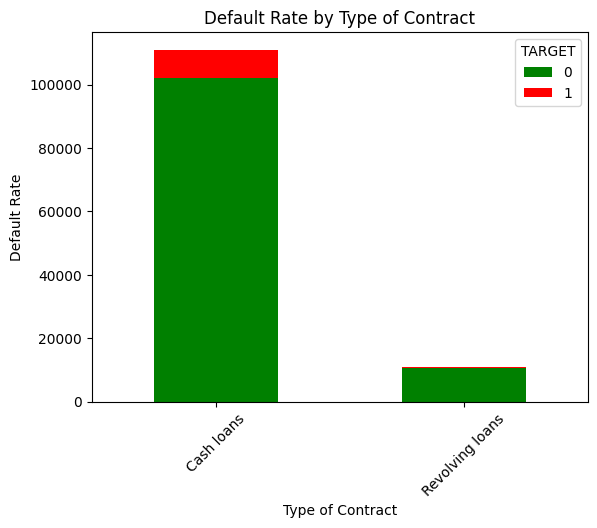

In [8]:
count_data = df.groupby(['NAME_CONTRACT_TYPE', 'TARGET']).size().unstack(fill_value=0)

count_data.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Type of Contract')
plt.ylabel('Default Rate')
plt.title('Default Rate by Type of Contract')
plt.xticks(rotation=45) 
plt.show()

The barplot below shows that more females have applied for loan, and the percentage of loan default for both gender is or the same order

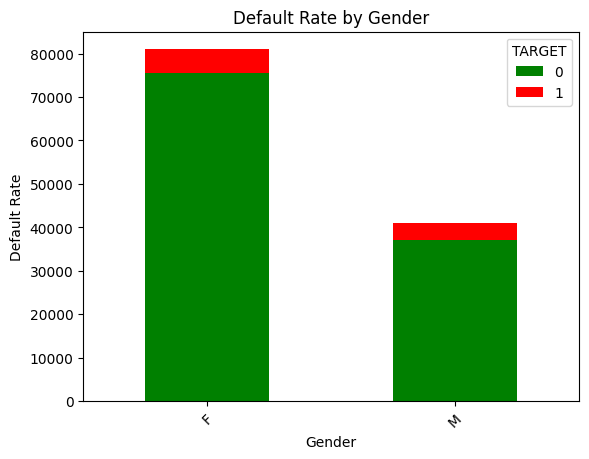

In [9]:
count_data = df.groupby(['CODE_GENDER', 'TARGET']).size().unstack(fill_value=0)

count_data.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.title('Default Rate by Gender')
plt.xticks(rotation=45)  
plt.show()

The barplot shows that the percentage of loan default is similar whether the person had previous ownership of realty or not.

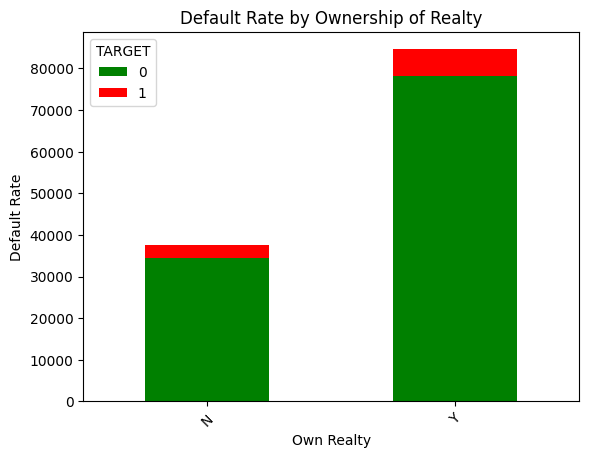

In [10]:
count_data = df.groupby(['FLAG_OWN_REALTY', 'TARGET']).size().unstack(fill_value=0)

count_data.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Own Realty')
plt.ylabel('Default Rate')
plt.title('Default Rate by Ownership of Realty')
plt.xticks(rotation=45) 
plt.show()

The barplot below shows the relationship between loan default status and family status

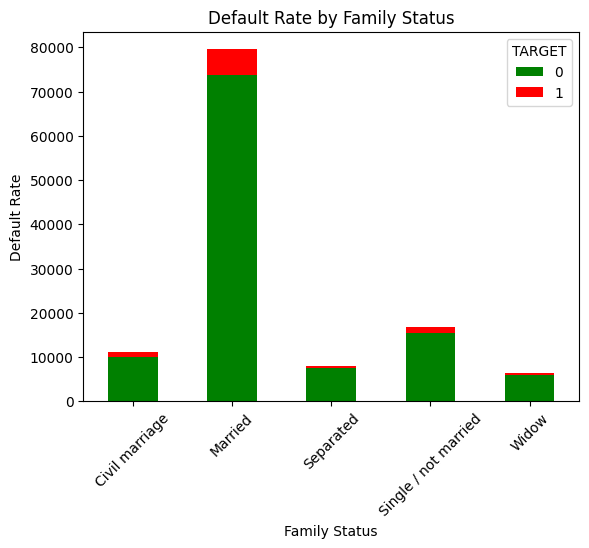

In [11]:
count_data = df.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack(fill_value=0)

count_data.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Family Status')
plt.ylabel('Default Rate')
plt.title('Default Rate by Family Status')
plt.xticks(rotation=45) 
plt.show()

The barplot below shows the relationship between load default status and income type

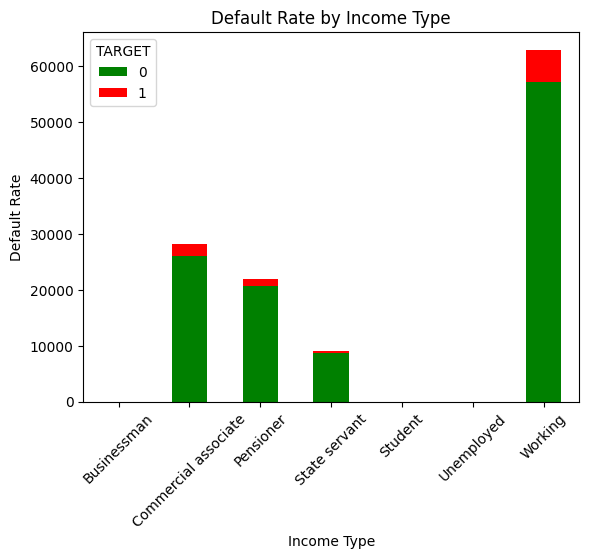

In [12]:
count_data = df.groupby(['NAME_INCOME_TYPE', 'TARGET']).size().unstack(fill_value=0)

count_data.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Income Type')
plt.ylabel('Default Rate')
plt.title('Default Rate by Income Type')
plt.xticks(rotation=45) 
plt.show()

<Axes: title={'center': 'Count of Default'}, xlabel='TARGET', ylabel='count'>

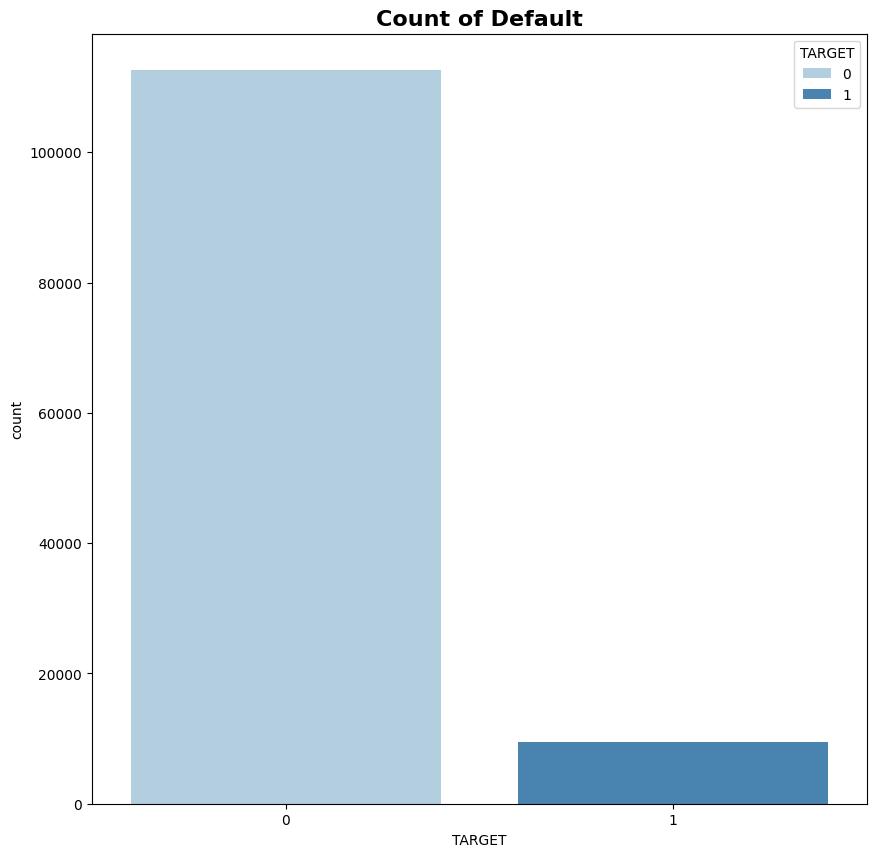

In [13]:
plt.figure(figsize=(10,10))
plt.title("Count of Default", fontweight = 'bold', fontsize = 16)
sns.countplot(x ='TARGET',data=df, hue='TARGET',palette="Blues")

# Prediction

## Decision Tree

In [62]:
from sklearn.model_selection import train_test_split

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Convert non-numeric columns to one-hot encoding
df_encoded = pd.get_dummies(df, columns=non_numeric_columns)

X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% validation of the training data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the data before applying LDA
print("Scaling data...")
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

print("Performing cross-validation with all features...")
cv_scores_all = cross_val_score(model, X_train_resampled_scaled, y_train_resampled, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
print(f'Cross-validation F1 scores with all features: {cv_scores_all}')
print(f'Average cross-validation F1 score with all features: {cv_scores_all.mean()}')

# Train the model on the training set
model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
print('')
print("Predicting on the validation set...")
y_val_pred = model.predict(X_val)

# Evaluate the predictions
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report:')
print(val_report)

# Predict on the test set
print("Predicting on the test set...")
y_test_pred = model.predict(X_test)

# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, zero_division=1)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')

print(test_report)

Scaling data...
Performing cross-validation with all features...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.2s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.3s finished


Cross-validation F1 scores with all features: [0.78080702 0.99607853 0.9953016  0.9953756  0.99637449]
Average cross-validation F1 score with all features: 0.9527874496368529

Predicting on the validation set...
Validation Accuracy: 0.9189809125911362
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22469
           1       0.40      0.03      0.06      1945

    accuracy                           0.92     24414
   macro avg       0.66      0.51      0.51     24414
weighted avg       0.88      0.92      0.89     24414

Predicting on the test set...
Test Accuracy: 0.9211108380437454
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22527
           1       0.38      0.03      0.06      1887

    accuracy                           0.92     24414
   macro avg       0.65      0.51      0.51     24414
weighted avg       0.88

Precision: 0.8549571877878556
Recall: 0.9166052265093798
F1_score: 0.8831485970527277


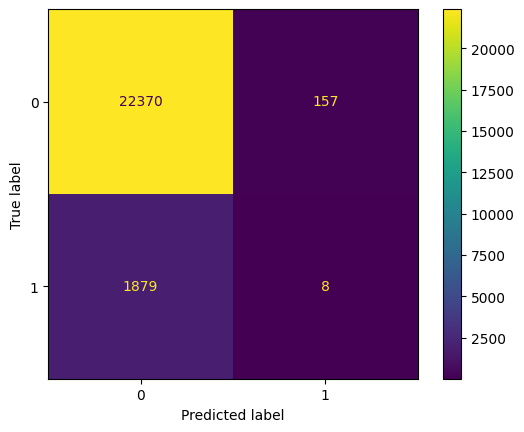

In [64]:
#@title More Evaluation Metrics

import sklearn.metrics as metrics

print("Precision:", metrics.precision_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("Recall:", metrics.recall_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("F1_score:", metrics.f1_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_val_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();



## Search for best model with all the features

In [65]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled_scaled, y_train_resampled)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [66]:
# Train the model on the training set
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
print('')
print("Predicting on the validation set...")
y_val_pred = best_model.predict(X_val)

# Evaluate the predictions
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report:')
print(val_report)

# Predict on the test set
print("Predicting on the test set...")
y_test_pred = best_model.predict(X_test)

# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, zero_division=1)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')

print(test_report)


Predicting on the validation set...
Validation Accuracy: 0.9203735561563038
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22469
           1       0.51      0.01      0.02      1945

    accuracy                           0.92     24414
   macro avg       0.72      0.51      0.49     24414
weighted avg       0.89      0.92      0.88     24414

Predicting on the test set...
Test Accuracy: 0.9223396411894814
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22527
           1       0.40      0.01      0.02      1887

    accuracy                           0.92     24414
   macro avg       0.66      0.50      0.49     24414
weighted avg       0.88      0.92      0.89     24414



Precision: 0.854769793537439
Recall: 0.9210289178340296
F1_score: 0.8849336943170132


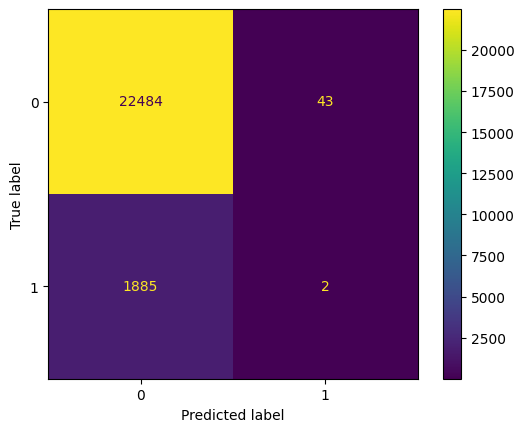

In [67]:
#@title More Evaluation Metrics

import sklearn.metrics as metrics

print("Precision:", metrics.precision_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("Recall:", metrics.recall_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("F1_score:", metrics.f1_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_val_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();


Note: with all the features selected, the cross-validation score is 0.952.

# Feature Selection


## Approach 1: Linear Discriminant Analysis

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [69]:
# Apply SMOTE to address class imbalance
print("Applying SMOTE...")
smote = SMOTE(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the shapes of the resampled data
print(f'Resampled training set shape: {X_train_resampled.shape}')
print(f'Resampled training labels shape: {y_train_resampled.shape}')

# Scale the data before applying LDA
print("Scaling data...")
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply LDA for feature selection
print("Applying LDA for feature selection...")
lda = LDA()
X_train_lda = lda.fit_transform(X_train_resampled_scaled, y_train_resampled)
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test_scaled)

# Verify the shapes of the LDA-transformed data
print(f'LDA-transformed training set shape: {X_train_lda.shape}')
print(f'LDA-transformed validation set shape: {X_val_lda.shape}')
print(f'LDA-transformed test set shape: {X_test_lda.shape}')


Applying SMOTE...


/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled training set shape: (135156, 163)
Resampled training labels shape: (135156,)
Scaling data...
Applying LDA for feature selection...
LDA-transformed training set shape: (135156, 1)
LDA-transformed validation set shape: (24414, 1)
LDA-transformed test set shape: (24414, 1)


In [70]:

# Initialize the model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=1)

# Perform cross-validation on the training data
print("Performing cross-validation...")
cv_scores = cross_val_score(model, X_train_lda, y_train_resampled, cv=5, verbose=1, n_jobs=-1)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

# Train the model on the resampled and transformed training set
print("Training the model...")
model.fit(X_train_lda, y_train_resampled, verbose=True)

# Predict on the validation set
print("Predicting on the validation set...")
y_val_pred = model.predict(X_val_lda)

# Evaluate the predictions
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred, zero_division=1)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report:')
print(val_report)

# Predict on the test set
print("Predicting on the test set...")
y_test_pred = model.predict(X_test_lda)

# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, zero_division=1)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)

Performing cross-validation...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


Cross-validation scores: [0.79202427 0.99652251 0.99711442 0.99696645 0.99711442]
Average cross-validation score: 0.9559484146034736
Training the model...
Predicting on the validation set...
Validation Accuracy: 0.919062832800852
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22469
           1       0.22      0.01      0.01      1945

    accuracy                           0.92     24414
   macro avg       0.57      0.50      0.48     24414
weighted avg       0.86      0.92      0.88     24414

Predicting on the test set...
Test Accuracy: 0.9219710002457606
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22527
           1       0.30      0.01      0.01      1887

    accuracy                           0.92     24414
   macro avg       0.61      0.50      0.49     24414
weighted avg       0.87      0.92      0.89  

Precision: 0.8646819010043918
Recall: 0.919062832800852
F1_score: 0.8850848605441439


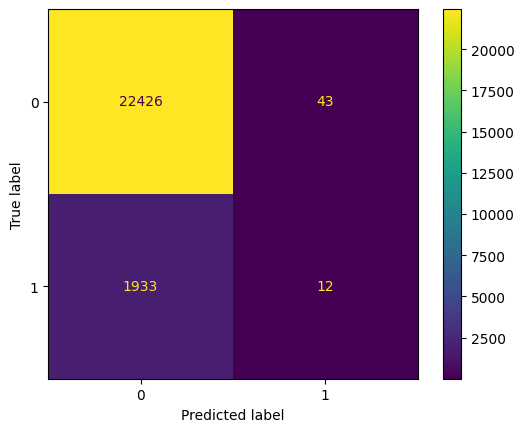

In [71]:
#@title More Evaluation Metrics

import sklearn.metrics as metrics

print("Precision:", metrics.precision_score(y_val, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("Recall:", metrics.recall_score(y_val, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("F1_score:", metrics.f1_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!

# Create the confusion matrix
cm = metrics.confusion_matrix(y_val, y_val_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();



## Search for best model with LDA

In [58]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train_lda, y_train_resampled)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [41]:
# Train the model on the training set
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
print('')
print("Predicting on the validation set...")
y_val_pred = best_model.predict(X_val)

# Evaluate the predictions
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report:')
print(val_report)

# Predict on the test set
print("Predicting on the test set...")
y_test_pred = best_model.predict(X_test)

# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, zero_division=1)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')

print(test_report)


Predicting on the validation set...
Validation Accuracy: 0.8910870811829278
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     22469
           1       0.22      0.15      0.18      1945

    accuracy                           0.89     24414
   macro avg       0.58      0.55      0.56     24414
weighted avg       0.87      0.89      0.88     24414

Predicting on the test set...
Test Accuracy: 0.8963709347095928
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     22527
           1       0.24      0.15      0.19      1887

    accuracy                           0.90     24414
   macro avg       0.58      0.56      0.57     24414
weighted avg       0.88      0.90      0.89     24414



Precision: 0.8646819010043918
Recall: 0.919062832800852
F1_score: 0.8850848605441439


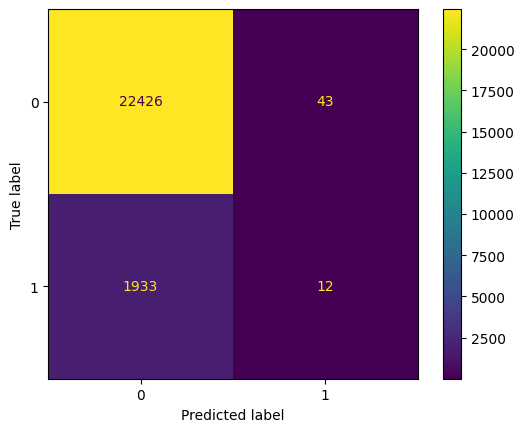

In [59]:
#@title More Evaluation Metrics

import sklearn.metrics as metrics

print("Precision:", metrics.precision_score(y_val, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("Recall:", metrics.recall_score(y_val, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("F1_score:", metrics.f1_score(y_test, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!

# Create the confusion matrix
cm = metrics.confusion_matrix(y_val, y_val_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();



## Analysis of performance with LDA

Note that with LDA, the accuracy has increased from 0.918 to 0.919. However, the f1-score decreaed from 0.06 to 0.01. The cross-validation score has improved to 0.956 compared to the case with all the features selected.

Hence, we can conclude that the LDA has improved the performance.

## Possible reasons for reduction in f1-score

- LDA assumes that the data for each class is normally distributed. It also assumes  that all classes have the same covariance matrix. If these assumptions do not hold, the LDA projection might not be optimal, and can lead to reduction in f1-score.
- While LDA reduces the dimensionality of the data, this lead to loss of information, which can in turn lead to reduced f1-score

## Approach 2: Principal Component Analysis

20
40
60
80
100
[CV] END ..................................learning_rate=0.1; total time=  10.7s
[CV] END .................................learning_rate=0.01; total time=  11.8s
[CV] END ..................................learning_rate=0.1; total time=  10.4s
120
[CV] END ..................................learning_rate=0.2; total time=  10.7s
[CV] END .................................learning_rate=0.01; total time=  11.1s
[CV] END .................................learning_rate=0.01; total time=  10.9s
[CV] END ..................................learning_rate=0.1; total time=  10.8s
[CV] END ..................................learning_rate=0.2; total time=  10.5s
[CV] END ..................................learning_rate=0.2; total time=   5.0s
140
160


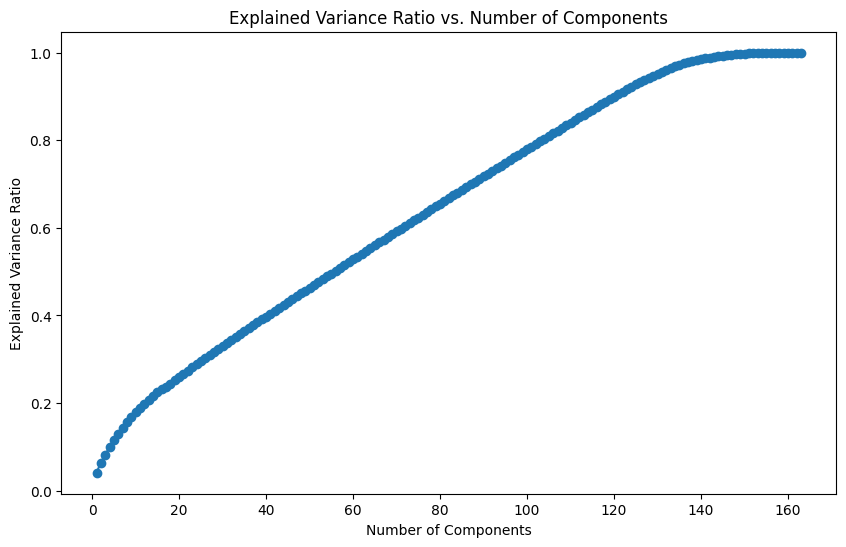

Optimal number of components: 129
PCA-transformed training set shape: (135156, 129)
PCA-transformed validation set shape: (24414, 129)
PCA-transformed test set shape: (24414, 129)


In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data before applying PCA
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Find the optimal number of components for PCA
explained_variance_ratios = []
components_range = range(1, X_train_resampled_scaled.shape[1] + 1)

for n_components in components_range:
    if (n_components % 20) == 0:
        print(n_components)
    pca = PCA(n_components=n_components)
    pca.fit(X_train_resampled_scaled)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratios to find the elbow point
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variance_ratios, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

# Choose the number of components that capture the desired amount of variance (e.g., 95%)
optimal_n_components = next(x[0] for x in enumerate(explained_variance_ratios) if x[1] >= 0.95)
print(f'Optimal number of components: {optimal_n_components}')

# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_n_components)
X_train_pca = pca.fit_transform(X_train_resampled_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Verify the shapes of the PCA-transformed data
print(f'PCA-transformed training set shape: {X_train_pca.shape}')
print(f'PCA-transformed validation set shape: {X_val_pca.shape}')
print(f'PCA-transformed test set shape: {X_test_pca.shape}')


In [73]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform cross-validation on the training data
cv_scores = cross_val_score(model, X_train_pca, y_train_resampled, cv=5, verbose=1, n_jobs=-1)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')

# Train the model on the resampled and transformed training set
model.fit(X_train_pca, y_train_resampled)

# Predict on the validation set
print('')
print("Predicting on the validation set...")
y_val_pred = model.predict(X_val_pca)

# Evaluate the predictions
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred, zero_division=1)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report:')
print(val_report)

# Predict on the test set
print("Predicting on the test set...")
y_test_pred = model.predict(X_test_pca)

# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, zero_division=1)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.6s remaining:   32.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.1s finished


Cross-validation scores: [0.78932376 0.97673042 0.97861714 0.97610151 0.97784026]
Average cross-validation score: 0.9397226197790358

Predicting on the validation set...
Validation Accuracy: 0.9011632669779635
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     22469
           1       0.23      0.10      0.14      1945

    accuracy                           0.90     24414
   macro avg       0.58      0.54      0.55     24414
weighted avg       0.87      0.90      0.88     24414

Predicting on the test set...
Test Accuracy: 0.90411239452773
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     22527
           1       0.24      0.11      0.15      1887

    accuracy                           0.90     24414
   macro avg       0.58      0.54      0.55     24414
weighted avg       0.88      0.90      0.89     24414



Precision: 0.8705657286227226
Recall: 0.9011632669779635
F1-score: 0.8834458036934257


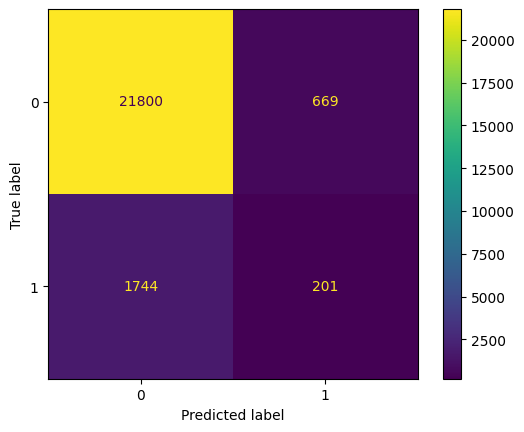

In [79]:
#@title More Evaluation Metrics

import sklearn.metrics as metrics

print("Precision:", metrics.precision_score(y_val, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("Recall:", metrics.recall_score(y_val, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!
print("F1-score:", metrics.f1_score(y_val, y_val_pred, average = 'weighted')) # Note - multi-class problem so not straight forward!

# Create the confusion matrix
cm = metrics.confusion_matrix(y_val, y_val_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot();



In [80]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.3],
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train_resampled)

best_model = grid_search.best_estimator_


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .................................learning_rate=0.05; total time=  30.1s
[CV] END ..................................learning_rate=0.1; total time=  29.9s
[CV] END .................................learning_rate=0.02; total time=  30.9s
[CV] END ..................................learning_rate=0.2; total time=  29.3s
[CV] END .................................learning_rate=0.01; total time=  31.3s
[CV] END ..................................learning_rate=0.3; total time=  29.2s
[CV] END .................................learning_rate=0.01; total time=  30.8s
[CV] END ..................................learning_rate=0.1; total time=  29.9s
[CV] END .................................learning_rate=0.02; total time=  30.7s
[CV] END ..................................learning_rate=0.1; total time=  30.0s
[CV] END .................................learning_rate=0.05; total time=  29.9s
[CV] END .................................learnin

In [ ]:
# Train the model on the training set
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
print('')
print("Predicting on the validation set...")
y_val_pred = best_model.predict(X_val)

# Evaluate the predictions
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report:')
print(val_report)

# Predict on the test set
print("Predicting on the test set...")
y_test_pred = best_model.predict(X_test)

# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, zero_division=1)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')

print(test_report)

## Analysis of performance with PCA

With PCA, the accuracy slightly decreased to 0.90, but the f1-score for '1' increased from 0.06 to 0.14. The cross-validation score has reduced to 0.939 from 0.952 with all the features.

Hence, it is not advisable to use PCA.

## Possible reasons for decreaed accuracy:

- While PCA reduces the dimensionality of the data by projecting it into a smaller number of components, it does lead to loss of imformation. This may lead to reduction in accuracy

- PCA in based on using linear transformation and may not capture the nonlinear relationships between features. This can also lead to reduced accuracy.



## Approach 3: Factor Analysis

In [75]:
from sklearn.decomposition import FactorAnalysis

# Apply SMOTE to address class imbalance
print("Applying SMOTE...")
smote = SMOTE(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the shapes of the resampled data
print(f'Resampled training set shape: {X_train_resampled.shape}')
print(f'Resampled training labels shape: {y_train_resampled.shape}')

# Scale the data before applying Factor Analysis
print("Scaling data...")
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Apply Factor Analysis for feature reduction
print("Applying Factor Analysis for feature reduction...")
fa = FactorAnalysis(n_components=None)
X_train_fa = fa.fit_transform(X_train_resampled_scaled)
X_val_fa = fa.transform(X_val_scaled)
X_test_fa = fa.transform(X_test_scaled)

# Verify the shapes of the FA-transformed data
print(f'FA-transformed training set shape: {X_train_fa.shape}')
print(f'FA-transformed validation set shape: {X_val_fa.shape}')
print(f'FA-transformed test set shape: {X_test_fa.shape}')


Applying SMOTE...


/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/imblearn/over_sampling/_smote/base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Resampled training set shape: (135156, 163)
Resampled training labels shape: (135156,)
Scaling data...
Applying Factor Analysis for feature reduction...
FA-transformed training set shape: (135156, 163)
FA-transformed validation set shape: (24414, 163)
FA-transformed test set shape: (24414, 163)


In [53]:
# Initialize the model
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', verbosity=1)

# Perform cross-validation on the training data
print("Performing cross-validation with Factor Analysis...")
cv_scores_fa = cross_val_score(model, X_train_fa, y_train_resampled, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
print(f'Average cross-validation F1 score with Factor Analysis: {cv_scores_fa.mean()}')

# Train the model on the FA-transformed training set
print("Training the model with Factor Analysis...")
model.fit(X_train_fa, y_train_resampled, verbose=True)

# Predict on the validation set with Factor Analysis
print("Predicting on the validation set with Factor Analysis...")
y_val_pred_fa = model.predict(X_val_fa)

# Evaluate the predictions with Factor Analysis
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report_fa = classification_report(y_val, y_val_pred_fa, zero_division=1)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report with Factor Analysis:')
print(val_report_fa)

# Predict on the test set
print("Predicting on the test set...")
y_test_pred = model.predict(X_test_fa)

# Evaluate the predictions
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, zero_division=1)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_report)

Performing cross-validation with Factor Analysis...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.1s remaining:   40.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.5s finished


Average cross-validation F1 score with Factor Analysis: 0.9480905261980699
Training the model with Factor Analysis...
Predicting on the validation set with Factor Analysis...
Validation Accuracy: 0.8995658228885066
Validation Classification Report with Factor Analysis:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     22469
           1       0.30      0.06      0.09      1945

    accuracy                           0.91     24414
   macro avg       0.61      0.52      0.52     24414
weighted avg       0.87      0.91      0.89     24414

Predicting on the test set...
Test Accuracy: 0.9148849021053493
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     22527
           1       0.28      0.06      0.10      1887

    accuracy                           0.91     24414
   macro avg       0.60      0.52      0.53     24414
weighted avg       0.88      0.91      

## Analysis of performance with Factor Analysis

With Factor Analysis, the accuracy is almost the same (0.919) as that of the original prediction model (without feature reduction). However, the f1-score for '1' has increaed from 0.06 to 0.09. The cross-validation score has slightly reduced to 0.948.

However, the number of features selected has not reduced.

## Conclusion

Given the three feature selection techniques:

With LDA, the number of features selected is 1 and the cross-validation score has improved.

With PCA, the number of features selected is 129 and the cross-validation score has reduced.

With Factor Analysis, the cross-validation score has reduced. Also, there no reduction in the number of features - which remains at 163. Hence, we reject this method.

Given above, the LDA method is best suited for feature reduction.

### Reason why LDA performs better than PCA
- LDA:  Maximizes class separability. PCA: Maximizes data variance.
- LDA: Supervised (uses class labels). PCA: Unsupervised (does not use class labels).

## Conclusion 2

Original         : F1-score = 0.8831
Best original    : F1-score = 0.8849

LDA              : F1-score = 0.8851
Best LDA         : F1-score = 0.8851

PCA              : F1-score = 0.8834
Best PCA         : F1-score = 